In [7]:
#!usr/bin/env python  
#coding=utf-8  
import pyaudio  
import wave  
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import librosa

## Define useful functions

In [8]:
max_signal = 32767
min_signal = -32768 

def bytes_to_numpy(data):
    '''
    Takes bytes from an audio stream and returns normalized numpy array (2ch)
    '''
    # Turn into numpy array
    data_np = np.frombuffer(data, dtype=np.int16).astype(np.float32)
    # Reshape into two channels
    data_np = np.reshape(data_np, (-1, 2))
    # Normalize by the max possible values
    data_np = (data_np - min_signal)/(max_signal-min_signal) - 0.5
    
    return data_np

def numpy_to_bytes(data):
    '''
    Takes normalized numpy array (2ch) and returns a bytes buffer for audio streaming
    '''
    return (((data+0.5)*(max_signal-min_signal)+min_signal).astype(np.int16)).tobytes()

## Find beats in a subset of the track

In [10]:
# Length of the sample in seconds
sample_dur = 10

#open a wav format music  
f = wave.open(r"House4TheHomies_short.wav","rb")  
# Set to further into the file
f.setpos(0)

# Number of samples to fetch
chunk_size = sample_dur*f.getframerate()

tempo, beat_frames = librosa.beat.beat_track(y=bytes_to_numpy(f.readframes(chunk_size))[:,0], sr=f.getframerate())
beat_times = librosa.frames_to_time(beat_frames, sr=f.getframerate())
print(tempo)
print(beat_frames)
print(beat_times)

123.046875
[  5  46  88 130 172 213 255 297 338 380 422 463 505 547 588 630 672 713
 755]
[0.05804989 0.53405896 1.021678   1.50929705 1.9969161  2.47292517
 2.96054422 3.44816327 3.92417234 4.41179138 4.89941043 5.3754195
 5.86303855 6.3506576  6.82666667 7.31428571 7.80190476 8.27791383
 8.76553288]


## Play the track one chunk at a time

In [18]:
#define stream chunk length
chunk = 256  
chunk_dur = float(chunk)/f.getframerate()
print(chunk_dur, ' seconds per chunk')

#open a wav format music  
f = wave.open(r"House4TheHomies_short.wav","rb")  
# Set to further into the file
f.setpos(0)
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  



# Read data
data = f.readframes(chunk)  


energies = []

mini = 0
maxi = 0

sample_count = 0
time = 0

# Thresholds for determining a beat
threshold_jitter = 1.0/(tempo/60.0)/10.0 # Calculated to be half of a beat (maybe too loose)
threshold_energy = 0.01 # Fine-tune?

print('Jitter thresh: ', threshold_jitter)
print('Jitter energy: ', threshold_energy)

#play stream  
while data:  
    # Write the data to the output stream
    stream.write(data)  
    # Format data 
    data_np = bytes_to_numpy(data)
    # Decide if this frame is a beat
    if((np.min(np.abs(time - beat_times)) < threshold_jitter) and (np.sum(data_np**2) > threshold_energy)):
        print('BEAT!')
        cv2.imshow('frame', np.zeros((100, 100, 3)))
        cv2.waitKey(1)
    else:
        cv2.imshow('frame', np.ones((100, 100, 3)))
        cv2.waitKey(1)
            
    # Read next chunk and update counters
    data = f.readframes(chunk) 
    sample_count += chunk
    time = float(sample_count)/f.getframerate()
    
    # NOW WE HAVE TO REFINE OUR BEAM TIME CALCULATIONS!!!!
    
    
    
#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  

0.005804988662131519  seconds per chunk
Jitter thresh:  0.04876190476190476
Jitter energy:  0.01
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEAT!
BEA

KeyboardInterrupt: 

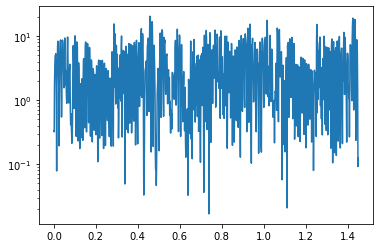

0 0 32768.0


In [68]:
y = energies[0:1000]
x = np.linspace(0, len(y)*chunk/f.getframerate(), len(y))
plt.plot(x, y)
plt.yscale('log')
plt.show()
energies[0]
print(mini, maxi, 2**16/2)

In [76]:

#open a wav format music  
f = wave.open(r"House4TheHomies_short.wav","rb")  
# Set to further into the file
f.setpos(0)

#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True) 
# Extreme values based on 16 bit signed int
max_signal = 32767
min_signal = -32768 

# Pull apart harmonic and percussive elements of the music 
y_harm_left, y_perc_left = librosa.effects.hpss(data_np[:,0])
y_harm_right, y_perc_right = librosa.effects.hpss(data_np[:,1])
y_harm = np.stack([y_harm_left, y_harm_right], axis=-1)
y_perc = np.stack([y_perc_left, y_perc_right], axis=-1)
# We have to convert this back to bytes before writing to stream....
y_harm_bytes = (((y_harm+0.5)*(max_signal-min_signal)+min_signal).astype(np.int16)).tobytes()
y_perc_bytes = (((y_perc+0.5)*(max_signal-min_signal)+min_signal).astype(np.int16)).tobytes()
y_both_bytes = (((y_perc+y_harm+0.5)*(max_signal-min_signal)+min_signal).astype(np.int16)).tobytes()
#stream.write(y_harm_bytes)  
stream.write(y_perc_bytes)  
#stream.write(y_both_bytes)  
#stream.write(data)  


In [ ]:
#!usr/bin/env python  
#coding=utf-8  

import pyaudio  
import wave  
import numpy as np
import cv2 

#define stream chunk   
#chunk = 1024  
#chunk = 32 
frames_per_chunk = 1280  

#open a wav format music  
#f = wave.open(r"/usr/share/sounds/alsa/Rear_Center.wav","rb")  
f = wave.open(r"House4TheHomies004.wav","rb")  
# Set to further into the file
f.setpos(3000000)
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  A
data = f.readframes(frames_per_chunk)  

min_energy = np.inf
max_energy = -1*np.inf

ones = np.ones((10,10,3), dtype=np.float32)
cv2.imshow('img', ones)
cv2.waitKey(1)

beats_per_bar = 4
beat_num = 0
estimate_bpm = 123
sec_per_chunk = frames_per_chunk/f.getframerate()
energy_window = 10

t_since_last = 0

# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (2, 7)
  
# fontScale
fontScale = 0.3
   
# Blue color in BGR
color = (255, 255, 0)
  
# Line thickness of 2 px
thickness = 1

#play stream  
while data:  
    stream.write(data)  
    data = f.readframes(chunk)  
    data_np = bytes_to_numpy(data)
    t_since_last += sec_per_chunk

    
    # Pull apart harmonic and percussive elements of the music 
    y_harm_left, y_perc_left = librosa.effects.hpss(data_np[:,0])
    y_harm_right, y_perc_right = librosa.effects.hpss(data_np[:,1])
    y_harm = np.stack([y_harm_left, y_harm_right], axis=-1)
    y_perc = np.stack([y_perc_left, y_perc_right], axis=-1)
    
    #energy = np.sum(y_perc**2)
    energy = np.sum(data_np**2)
    min_energy = min(energy, min_energy)
    max_energy = max(energy, max_energy)
    energy_coeff = (energy - min_energy)/(max_energy-min_energy) 
    opportunity = gauss_stuck(np.array([t_since_last]), sigma=0.1, mu=60/estimate_bpm)
    if(energy_coeff*opportunity >= 0.5):
        beat_num  = (beat_num + 1) % beats_per_bar
        t_since_last = 0
    print('{0:0.2f}\t{1:0.2f}\t{2:0.2f}'.format(t_since_last, 60/estimate_bpm, opportunity[0]))
    #print('{0:0.2f}\t{1:0.2f}\t{2:0.2f}'.format(energy_coeff, opportunity, opportunity*energy_coeff))
    
    cutoff = 0.3
    energy_coeff_clipped = max((1/cutoff)*(energy_coeff - cutoff), 0)
    #print(data_np.shape, energy, min_energy, max_energy, energy_coeff, energy_coeff_clipped)
    
    number_img = np.zeros_like(ones)
    number_img = cv2.putText(number_img, str(beat_num+1), org, font, fontScale, color, thickness, cv2.LINE_AA)
    
    #img = energy_coeff*ones + number_img
    img = number_img
    cv2.imshow('img', img)
    cv2.waitKey(1)


#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  

/home/bij/anaconda3/envs/Laser/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=0
  warnings.warn(


ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'

In [ ]:
import math
def gauss(x, sigma, mu):
    return (math.e**(-1*((x-mu)**2)/(2*sigma**2)))/(sigma*math.sqrt(2*math.pi))

def gauss_stuck(x, sigma, mu):
    g = gauss(x, sigma, mu)
    g_max = gauss(mu, sigma, mu)
    
    passed = x > (mu + sigma)
    
    g[passed] = g_max / 2
        
    return g

x = np.linspace(-10, 10, 100)
pdf = gauss_stuck(x, 1, 0)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, pdf)

plt.show()